In [38]:
import pandas as pd

In [39]:
data = pd.read_csv(r"C:\Users\ayush\OneDrive\Desktop\New folder\excel\1Dec to 3Jan Consultations.csv", low_memory=False)

In [40]:
missing_values = data.isnull().sum()
print(missing_values)


_id                               0
user                              0
chatStatus                     8512
guru                              0
guruName                          0
gid                               0
uid                               0
consultationType                  0
website                           0
refundStatus                      0
isWhiteListUser                   0
chatSeconds                    8513
queue                             0
freeCall                          0
freeChat                          0
createdAt                         0
updatedAt                         0
__v                               0
statementEntryId                151
chatStartTime                 18697
chatEndTime                   14996
timeDuration                   6629
callChannel                   19519
callIvrType                   19665
callStatus                    19486
CallSid                       19662
amount                        19011
astrologerCallStatus        

In [41]:
summary_stats = data.describe()
print(summary_stats)


                gid           uid   chatSeconds           __v  timeDuration  \
count  28027.000000  28027.000000  19514.000000  28027.000000  21398.000000   
mean     220.890498  34846.342812    349.158553      0.000178      1.977168   
std       86.575346   7812.317551    319.588213      0.013356      3.340467   
min        8.000000      1.000000    300.000000      0.000000     -0.166667   
25%      195.000000  31659.000000    300.000000      0.000000      0.000000   
50%      255.000000  36213.000000    300.000000      0.000000      0.100000   
75%      281.000000  40109.000000    300.000000      0.000000      4.356962   
max      325.000000  44005.000000   7980.000000      1.000000     67.000000   

            amount  astrologerOnCallDuration  astrologersEarnings  \
count  9016.000000               8365.000000          9016.000000   
mean     23.742890                128.791871            10.996736   
std      87.134998                245.204088            42.141543   
min       0.

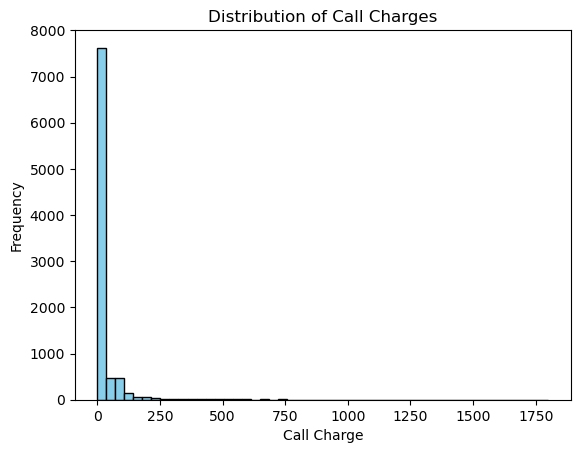

In [42]:
import matplotlib.pyplot as plt
plt.hist(data['amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Call Charges')
plt.xlabel('Call Charge')
plt.ylabel('Frequency')
plt.show()


In [43]:
avg_talk_time = data.groupby('consultationType')['chatSeconds'].mean()
print(avg_talk_time)


consultationType
Call                       NaN
Chat                349.158553
Complementary              NaN
public_live_Call           NaN
Name: chatSeconds, dtype: float64


In [44]:
most_common_source = data['source'].mode()[0]
print(f"Most common source: {most_common_source}")


Most common source: Production


In [45]:
total_spending = data['amount'].sum()
total_earnings = data['astrologersEarnings'].fillna(0).sum()
print(f"Total Spending: {total_spending}, Total Earnings: {total_earnings}")


Total Spending: 214065.89866666665, Total Earnings: 99146.57095000001


In [46]:
correlation = data[['chatSeconds', 'amount']].corr().loc['chatSeconds', 'amount']
print(f"Correlation between TalkTime and Charge: {correlation}")


Correlation between TalkTime and Charge: 0.4685507088448129


In [47]:
data['connectTime'] = pd.to_datetime(data['chatStartTime']) - pd.to_datetime(data['chatEndTime'])
avg_connect_time = data['connectTime'].mean()
print(f"Average connection time: {avg_connect_time}")


Average connection time: -1 days +23:59:23.407493334


In [48]:
data['chatStartTime'] = pd.to_datetime(data['chatStartTime'], errors='coerce')
data['chatEndTime'] = pd.to_datetime(data['chatEndTime'], errors='coerce')
data['disconnectTime'] = data['chatEndTime'] - data['chatStartTime']
print(data[['chatStartTime', 'chatEndTime', 'disconnectTime']].head())


                     chatStartTime                      chatEndTime  \
0 2023-12-01 00:07:33.248000+00:00 2023-12-01 00:07:33.773000+00:00   
1 2023-12-01 00:09:55.808000+00:00 2023-12-01 00:09:56.052000+00:00   
2 2023-12-01 00:22:04.072000+00:00 2023-12-01 00:22:04.325000+00:00   
3 2023-12-01 00:29:43.556000+00:00 2023-12-01 00:29:43.960000+00:00   
4                              NaT                              NaT   

          disconnectTime  
0 0 days 00:00:00.525000  
1 0 days 00:00:00.244000  
2 0 days 00:00:00.253000  
3 0 days 00:00:00.404000  
4                    NaT  


In [49]:
order_status_distribution = data['refundStatus'].value_counts()
print(order_status_distribution)


refundStatus
no-refund     28022
Approved          3
Rejected          1
Processing        1
Name: count, dtype: int64


In [50]:
total_refund = data['amount'].sum()
print(f"Total Refund Amount: {total_refund}")

Total Refund Amount: 214065.89866666665


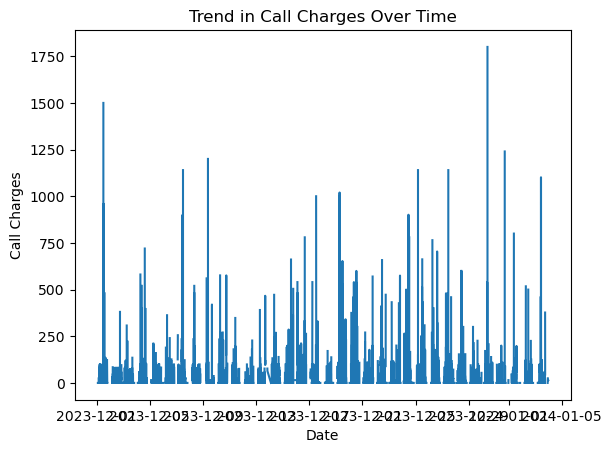

In [51]:
data['createdAt'] = pd.to_datetime(data['createdAt'])
plt.plot(data['createdAt'], data['amount'])
plt.title('Trend in Call Charges Over Time')
plt.xlabel('Date')
plt.ylabel('Call Charges')
plt.show()


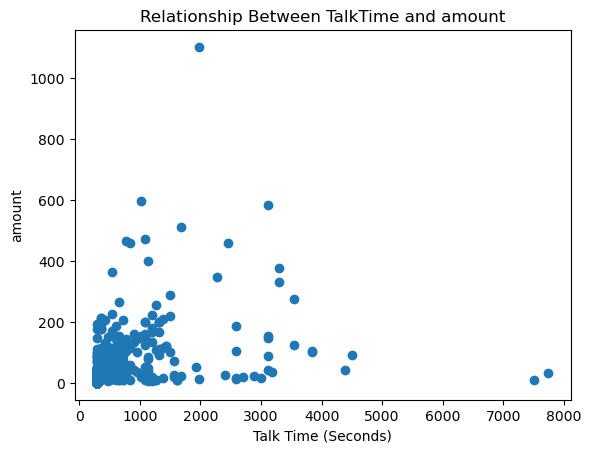

In [52]:
plt.scatter(data['chatSeconds'], data['amount'])
plt.title('Relationship Between TalkTime and amount')
plt.xlabel('Talk Time (Seconds)')
plt.ylabel('amount')
plt.show()



In [53]:
plt.savefig('chart.png')

<Figure size 640x480 with 0 Axes>